In [2]:
import numpy as np
from scipy.special import softmax
from simulate import simulate_hmm

In [18]:
np.random.seed(3)

# Set some parameters
init_probs = np.array([0.2, 0.8])

trans_mat = np.array([[0.8, 0.2],
                      [0.1,  0.9]])

B = np.array([[0.01, 0.8, 0.19],
              [0.8, 0.1, 0.1]])

ys, zs = simulate_hmm(init_probs, B, trans_mat, 100)

n_latent = trans_mat.shape[0]
n_outputs = B.shape[1]

In [19]:
B

array([[0.01, 0.8 , 0.19],
       [0.8 , 0.1 , 0.1 ]])

In [20]:
trans_mat

array([[0.8, 0.2],
       [0.1, 0.9]])

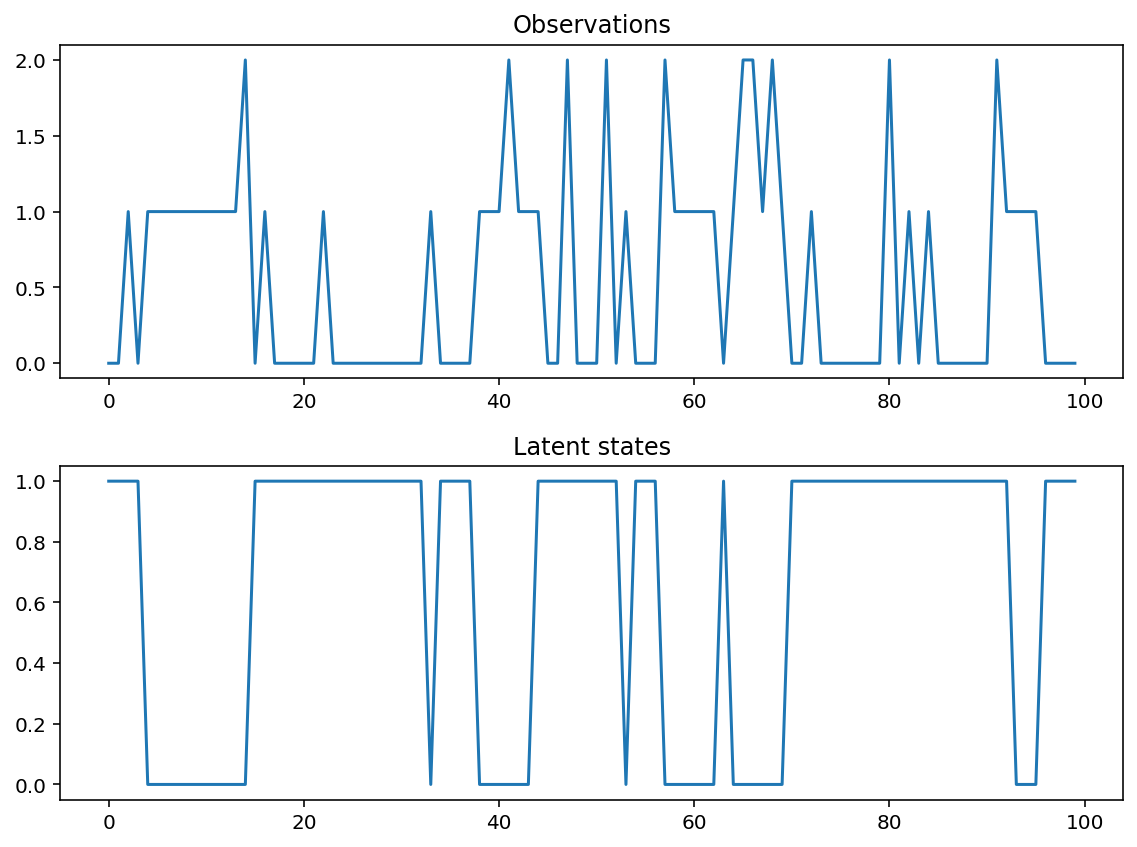

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(2, 1)

ax[0].plot(ys)
ax[0].set_title('Observations')
ax[1].plot(zs)
ax[1].set_title('Latent states')

f.set_size_inches(8, 6)
f.tight_layout()

In [22]:
# Do the E-step
# Initialise things randomly:
log_pi = np.log(softmax(np.random.randn(n_latent)))
log_mu = np.log(softmax(np.random.randn(n_latent, n_outputs), axis=1))
log_trans = np.log(softmax(np.random.randn(n_latent, n_latent), axis=1))

In [23]:
from scipy.special import logsumexp
from forward_backward import compute_log_alphas, compute_log_betas, compute_log_xis, e_step
from m_step_categorical import m_step

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
em_log_pi, em_log_mu, em_log_trans = log_pi, log_mu, log_trans

log_ps = list()

for i in range(500):

    log_gammas, log_xis, log_p = e_step(em_log_pi, em_log_mu, em_log_trans, ys)
    em_log_pi, em_log_trans, em_log_mu = m_step(log_gammas, log_xis, ys, em_log_mu.shape[1])
    log_ps.append(log_p)
    
log_ps = np.array(log_ps)

In [39]:
from viterbi import viterbi_log

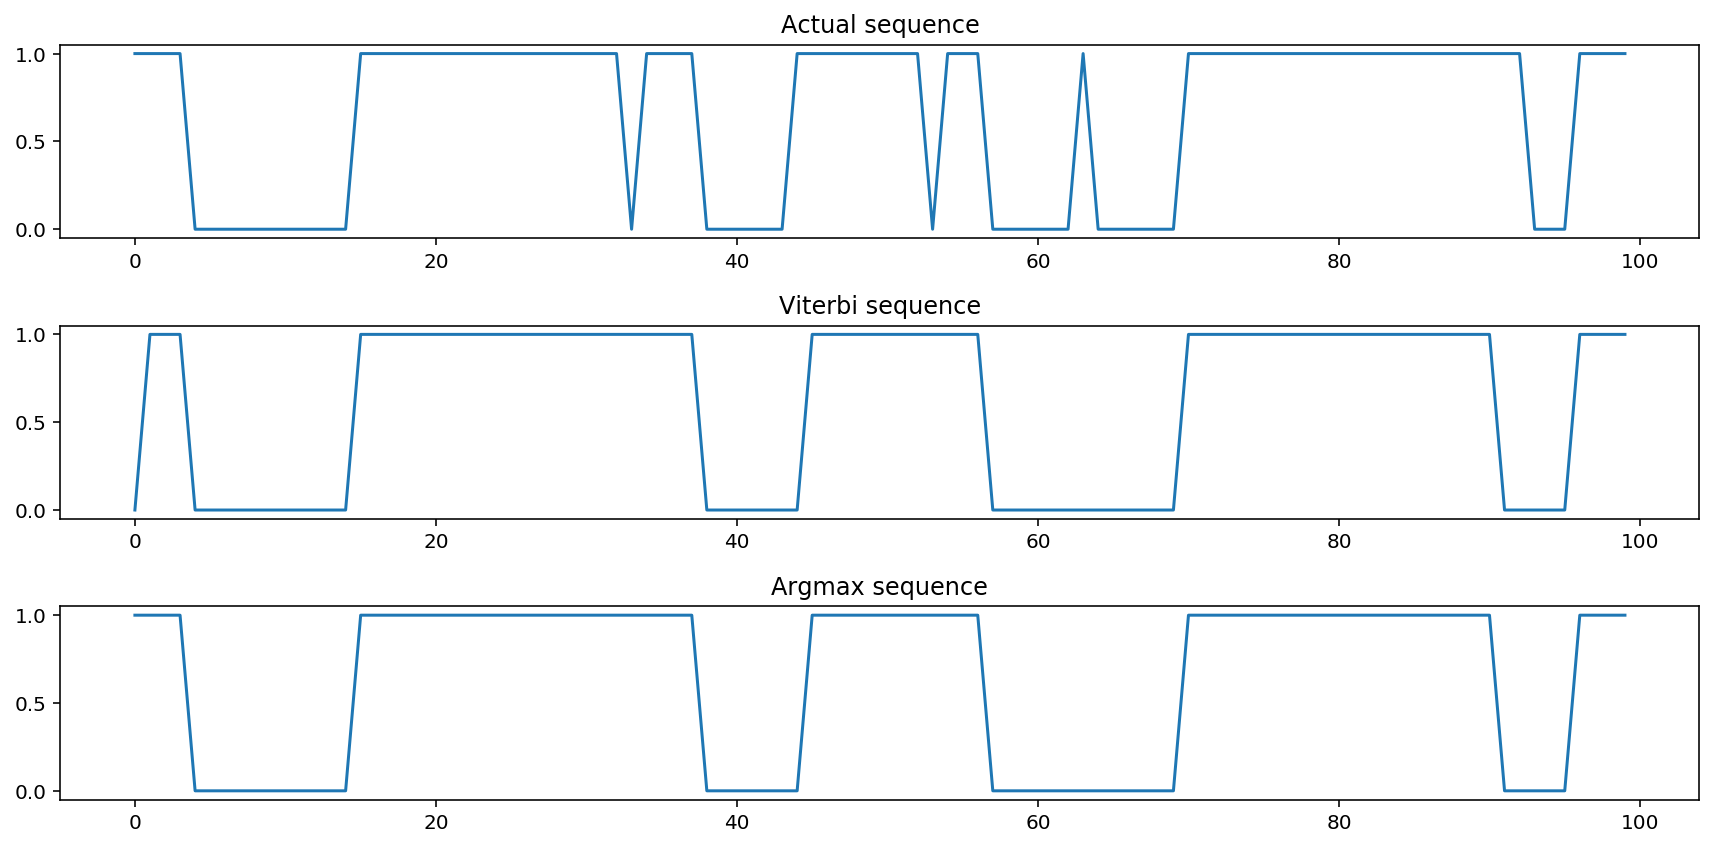

In [45]:
f, ax = plt.subplots(3, 1)

_, _, state_sequence = viterbi_log(em_log_pi, em_log_trans, em_log_mu, ys)
argmax_sequence = np.argmax(log_gammas, axis=1)

ax[0].plot(zs)
ax[1].plot(state_sequence)
ax[2].plot(argmax_sequence)

ax[0].set_title('Actual sequence')
ax[1].set_title('Viterbi sequence')
ax[2].set_title('Argmax sequence')

f.set_size_inches(12, 6)
f.tight_layout()

In [52]:
np.round(np.exp(em_log_trans), 2)

array([[0.85, 0.15],
       [0.08, 0.92]])

In [47]:
trans_mat

array([[0.8, 0.2],
       [0.1, 0.9]])

In [48]:
np.round(np.exp(em_log_mu), 2)

array([[0.04, 0.78, 0.18],
       [0.81, 0.13, 0.06]])

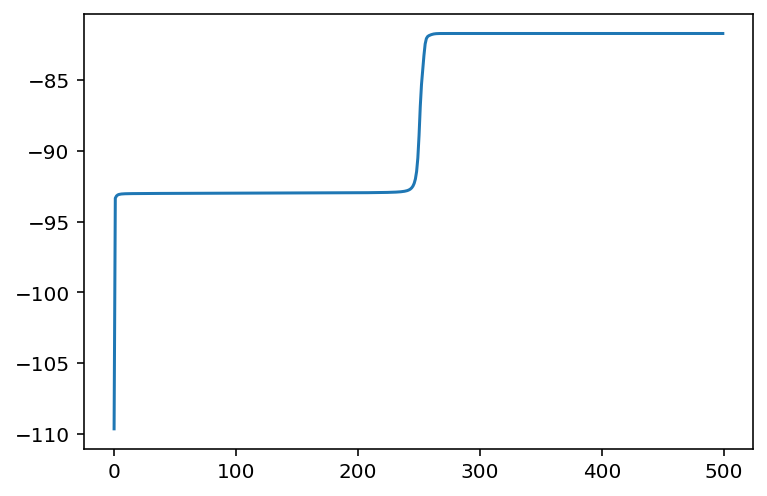

In [49]:
plt.plot(log_ps)

In [50]:
np.exp(em_log_pi)

array([0., 1.])

In [51]:
zs[0]

1